# Classification of News Articles into Fake or Real

#### 1. Initial Data Exploration
#### 2. ETL into IBM Watson

In [1]:
#Installing all required libraries
!pip install empath
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import itertools
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import string
import re
import nltk
import collections
from nltk.corpus import stopwords
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from empath import Empath
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

     |████████████████████████████████| 61kB 7.0MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


Using TensorFlow backend.


### Reading all CSV files having the data

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_28e1ae04e1374a27a7e18daccb061e3d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2wTjqU_WZRvidHPZDXGLtVpNk_zb1J0hikg-_6_h6mg9',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_28e1ae04e1374a27a7e18daccb061e3d.get_object(Bucket='advanceddscapstone-donotdelete-pr-b5y30pgwzzpsdm',Key='fake.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [3]:

body1 = client_28e1ae04e1374a27a7e18daccb061e3d.get_object(Bucket='advanceddscapstone-donotdelete-pr-b5y30pgwzzpsdm',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_1 = pd.read_csv(body1)
df_data_1.head()


,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [4]:

body2 = client_28e1ae04e1374a27a7e18daccb061e3d.get_object(Bucket='advanceddscapstone-donotdelete-pr-b5y30pgwzzpsdm',Key='fake_or_real_news.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body2, "__iter__"): body2.__iter__ = types.MethodType( __iter__, body2 )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_2 = pd.read_csv(body2)
df_data_2.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:

body3 = client_28e1ae04e1374a27a7e18daccb061e3d.get_object(Bucket='advanceddscapstone-donotdelete-pr-b5y30pgwzzpsdm',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body3, "__iter__"): body3.__iter__ = types.MethodType( __iter__, body3 )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_3 = pd.read_csv(body3)
df_data_3.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### Getting the relevant columns from the dataframes (Feature Engineering)

In [6]:
df_data_1.loc[df_data_1['Label']== 0, 'Label'] = 'REAL'
df_data_1.loc[df_data_1['Label']== 1, 'Label'] = 'FAKE'
print(df_data_1.columns)
print(df_data_1['Label'].value_counts())
df_data_1.drop(['URLs'], axis = 1, inplace = True)
df_data_1.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')
REAL    2137
FAKE    1872
Name: Label, dtype: int64


Index(['Headline', 'Body', 'Label'], dtype='object')

In [7]:
print(df_data_0.columns)
print(df_data_0['type'].value_counts())
df_data_0 = df_data_0.loc[df_data_0['type']=='fake']
df_data_0.loc[df_data_0['type']== 'fake', 'type'] = 'FAKE'
df_data_0 = df_data_0[['title','text','type']]
df_data_0.columns = ['Headline', 'Body', 'Label']
df_data_0['Label'].value_counts()

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type'],
      dtype='object')
bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64


FAKE    19
Name: Label, dtype: int64

In [8]:
df_data_2.columns
#Selecting few columns from the table and renaming the columns
df_data_2 = df_data_2[['title','text','label']]
df_data_2.columns = ['Headline', 'Body', 'Label']
df_data_2.columns
df_data_2['Label'].value_counts()

REAL    3171
FAKE    3164
Name: Label, dtype: int64

In [9]:
df_data_3.columns
df_data_3 = df_data_3[['title','text','label']]
df_data_3.columns = ['Headline', 'Body', 'Label']
df_data_3.loc[df_data_3['Label']== 0, 'Label'] = 'REAL'
df_data_3.loc[df_data_3['Label']== 1, 'Label'] = 'FAKE'
df_data_3.columns
df_data_3['Label'].value_counts()

FAKE    10413
REAL    10387
Name: Label, dtype: int64

#### Collecting all dataframes together and removing duplicates and dropping NULL values (Data Cleaning)

In [12]:
df_union = df_data_0.append(df_data_1, ignore_index = True)
df_union = df_union.append(df_data_2, ignore_index = True)
df_union = df_union.append(df_data_3, ignore_index = True)
#df_union.drop('URLs')
#df_union.columns = ['Headline', 'Body', 'Label']
print(df_union.columns)
print(df_union['Label'].value_counts())
#Dropping duplicates
df_union.drop_duplicates()
print(df_union['Label'].value_counts())
#Dropping NULLs
df_union = df_union.dropna(how='any',axis=0)
print(df_union['Label'].value_counts())
#df_union

Index(['Headline', 'Body', 'Label'], dtype='object')
REAL    15695
FAKE    15468
Name: Label, dtype: int64
REAL    15695
FAKE    15468
Name: Label, dtype: int64
REAL    15678
FAKE    14867
Name: Label, dtype: int64


In [13]:
count = 0
ind = []
for art in df_union['Body']:
    #print(type(art))
    if len(str(art)) < 10:
        ind.append(count)
    count+=1
df_union = df_union.drop(df_union.index[ind])
df_union

,Headline,Body,Label
0,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,FAKE
1,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...,FAKE
2,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,"adobochron 10 Comments \nSan Francisco, Califo...",FAKE
3,Comment on Tutorial: Riding The Philippine Jee...,"adobochron 1 Comment \nMANILA, Philippines (Th...",FAKE
4,Comment on What White House Executive Chef Com...,"adobochron 1 Comment Comerford \nWASHINGTON, D...",FAKE
5,Comment on Philippines Voids Building Permit O...,adobochron 7 Comments A rendering of the Trump...,FAKE
6,Comment on Hillary Clinton Campaign Logo Has A...,"adobochron 1 Comment \nSAN FRANCISCO, Californ...",FAKE
7,Comment on Philippine Government To ‘Take Back...,"adobochron 2 Comments \nMANILA, Philippines ( ...",FAKE
8,"Comment on If Elected President, Donald Trump ...",adobochron 2 Comments The Trump hotels in Las ...,FAKE
9,Comment on WHITE HOUSE EXECUTIVE CHEF REVEALS ...,"adobochron 3 Comments Comerford \nWashington, ...",FAKE


In [14]:
df_union['Label'].value_counts()

REAL    15677
FAKE    14753
Name: Label, dtype: int64

#### Data Visualization

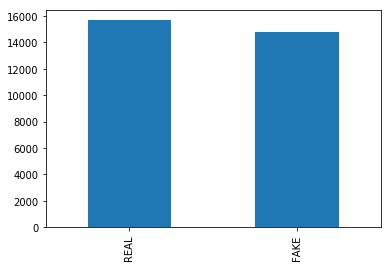

In [15]:
df_union['Label'].value_counts().plot(kind = 'bar')

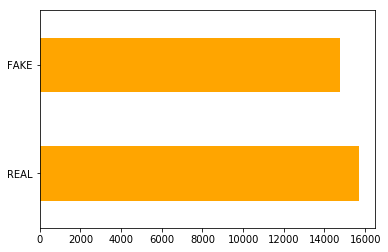

In [16]:
df_union['Label'].value_counts().plot(kind = 'barh',color='orange',width=0.5)

### Using NLP to transform the news article to Feature Vectors

In [17]:
df_union['headline_length'] = [len(str(a)) for a in df_union['Headline']]
df_union['headline_length'].describe()

count    30430.000000
mean        70.578344
std         23.820602
min          1.000000
25%         55.000000
50%         70.000000
75%         85.000000
max        653.000000
Name: headline_length, dtype: float64

In [18]:
df_union['body_length'] = [len(a) for a in df_union['Body']]
df_union['body_length'].describe()

count     30430.000000
mean       4465.837792
std        4952.436213
min          12.000000
25%        1619.000000
50%        3329.000000
75%        6091.750000
max      142961.000000
Name: body_length, dtype: float64

In [19]:
df_union.describe()

,headline_length,body_length
count,30430.000000,30430.000000
mean,70.578344,4465.837792
std,23.820602,4952.436213
min,1.000000,12.000000
25%,55.000000,1619.000000
50%,70.000000,3329.000000
75%,85.000000,6091.750000
max,653.000000,142961.000000


In [20]:
df_union["Text"] = df_union["Headline"].map(str) + df_union["Body"]
y = df_union.Label
y = y.astype('str')
X_train, X_test, Y_train, Y_test = train_test_split(df_union['Text'],y, test_size=0.30)
X_train

22046    Weather Apps to Download and Store Up for Wint...
8915     Meet the Trump Truthers: Media figures insist ...
11701    Bernie Sanders Meets With Pope Francis - The N...
22357    Geoengineering Watch Global Alert News, Novemb...
6558     Comment on You Are What You Read: Research Rev...
14595    Republican Party, Megyn Kelly, Titanic: Your W...
19129    With Iraq Mired in Turmoil, Some Call for Part...
25998    American Elections Are Vulnerable to Wholesale...
29331    Watch: Hugh Laurie Rips Republicans, Trump At ...
2222     Nobel Prize in Physics goes to 'black hole tel...
716      The Chicago Bears versus the Minnesota Vikings...
24339    Hacker behind Hollywood nude photo leak senten...
3895     Russell Witcher talks about 'Coming Out' memoi...
16934    Report: Colorado Taxpayers Paid $522M to Impri...
25979    Sharpton Calls on Schumer to Give GOP the ’Big...
12996    First effect of Trump win: Al-Qaeda morale in ...
9302     Obama should act with restraint on court: Jona.

In [21]:
#Tf-idf Bigrams
#Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range = (2,2)) 

# Fit and transform the training data 
tfidf1_train = tfidf_vectorizer.fit_transform(X_train.astype('str')) 

# Transform the test set 
tfidf1_test = tfidf_vectorizer.transform(X_test.astype('str'))

pickle.dump(tfidf1_train, open("tfidf1_train.pickle", "wb"))

pickle.dump(tfidf1_test, open("tfidf1_test.pickle", "wb"))

In [22]:
tfidf1_train

<21301x4218584 sparse matrix of type '<class 'numpy.float64'>'
	with 7781721 stored elements in Compressed Sparse Row format>

In [23]:
tfidf_vectorizer.get_feature_names()[-15:]

['这些区域组织应当积极作好准备 发挥自身潜力',
 '这些组织正在世界上发挥其政治影响 对加强区域安全和国际安全作出重大贡献',
 '进行过审查 众所周知',
 '都市如此 而且也是其国际公认的合法性的体现',
 '鉴于当代挑战和威胁的全球性质 要制定采取有效对策所需的集体办法',
 '集体安全条约组织 上海合作组织和独立国家联合体',
 '集体安全条约组织与联合国专门机构 包括安全理事会反恐怖主义委员会和联合国毒品和犯罪问题办公室',
 '集体安全条约组织是多层面结构 能对其成员国可能面临的当代广泛的挑战和威胁作出坚定回应',
 '集体安全条约组织正在积极促进帮助阿富汗进行冲突后重建以及消除来自该国的毒品威胁的国际努力 该组织与联合国的关系在许多领域都得到成功的发展',
 '集体安全条约组织秘书长博尔久扎 上海合作组织秘书长阿利莫夫以及独联体执行委员会副主席伊凡诺夫将发表讲话',
 '集体提出创新办法 嗣后可推广到安全理事会重点关注的世界其他地区',
 '非法贩运毒品以及确保国际信息安全 在此范畴内',
 '预防和解决冲突 反恐',
 'ﬁnds emotion',
 'ｓꮭ surprise']

#### Defining Confusion Matrix function. (Model Evaluation)

In [24]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model Training and Evaluation using Naive Bayes and Gradient Boosting Classifiers

### Naive Bayes

#### Training

In [25]:
clf = MultinomialNB()
clf.fit(tfidf1_train, Y_train)

pickle.dump(clf, open('tfidf_nb', 'wb'))
pred = clf.predict(tfidf1_test)
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy with Multinomial Naive Bayes:   %0.3f" % score)


Accuracy with Multinomial Naive Bayes:   0.920


### Model Evaluation

Confusion matrix


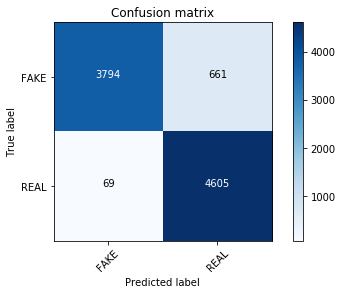

In [26]:
cm = metrics.confusion_matrix(Y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 score with MultinomialNB Classifier  %0.3f" %f1_score(Y_test, pred, average="macro"))
print("Precision with MultinomialNB Classifier   %0.3f" % precision_score(Y_test, pred, average="macro"))
print("Recall with MultinomialNB Classifier   %0.3f" % recall_score(Y_test, pred, average="macro"))

F1 score with MultinomialNB Classifier  0.919
Precision with MultinomialNB Classifier   0.928
Recall with MultinomialNB Classifier   0.918


### Gradient Boosting Classifier

#### Training

In [41]:
clf = GradientBoostingClassifier()
clf.fit(tfidf1_train, Y_train)

pickle.dump(clf, open('sem_gb', 'wb'))
pred = clf.predict(tfidf1_test)
score = metrics.accuracy_score(Y_test, pred)
print("Accuracy with Gradient Boosting: %0.3f" % score)

Accuracy with Gradient Boosting: 0.851


#### Model Evaluation

Confusion matrix


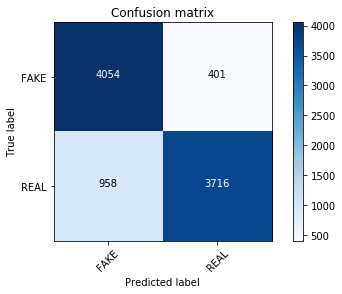

In [43]:
cm = metrics.confusion_matrix(Y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("F1 score with MultinomialNB Classifier  %0.3f" %f1_score(Y_test, pred, average="macro"))
print("Precision with MultinomialNB Classifier   %0.3f" % precision_score(Y_test, pred, average="macro"))
print("Recall with MultinomialNB Classifier   %0.3f" % recall_score(Y_test, pred, average="macro"))

F1 score with MultinomialNB Classifier  0.851
Precision with MultinomialNB Classifier   0.856
Recall with MultinomialNB Classifier   0.853


## Training the Model using Neural Network (Deep Learning)

In [30]:
df_union.count()
df_union.loc[df_union['Label']== 'REAL', 'Label'] = '1'
df_union.loc[df_union['Label']== 'FAKE', 'Label'] = '0'

In [31]:
token = Tokenizer()
token.fit_on_texts(df_union['Text'])
word_index= token.word_index
vocab_size_dl = len(word_index)
print(vocab_size_dl)

289479


In [32]:
sequence_word = token.texts_to_sequences(df_union['Text'])
padded = pad_sequences(sequence_word, maxlen=500, padding='post', truncating='post')

In [33]:
split = 0.3
split_n = int(round(len(padded)*(1-split),0))

train_data = padded[:split_n]
train_labels = df_union['Label'].values[:split_n]
test_data = padded[split_n:]
test_labels = df_union['Label'].values[split_n:]


### Model Training

Defining Neural Network Architecture

In [34]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size_dl+1, 100, trainable=False),#, weights=[embeddings_matrix]
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(20, return_sequences=True),
    tf.keras.layers.LSTM(20),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dropout(0.3),  
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history = model.fit(train_data, train_labels, epochs=7, batch_size=100, validation_data=[test_data, test_labels])

print("Training Complete")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         28948000  
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 20)          6800      
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
__________

### Model Evaluation - Accuracy Visualization

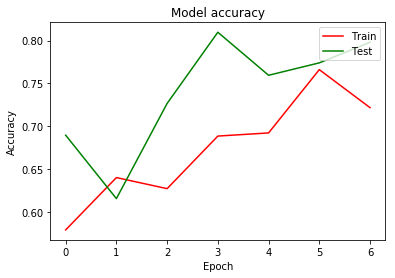

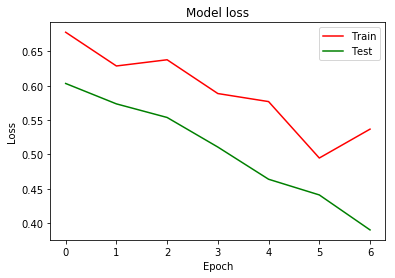

In [36]:
plt.plot(history.history['acc'],color='red')
plt.plot(history.history['val_acc'],color='green')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='green')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [37]:
model.predict(test_data)

array([[0.7499373 ],
       [0.77920604],
       [0.09832749],
       ...,
       [0.8274684 ],
       [0.051007  ],
       [0.07848746]], dtype=float32)

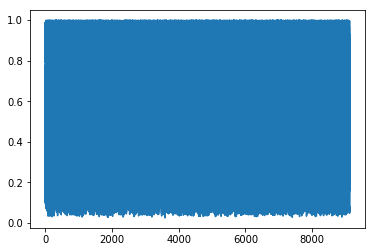

In [40]:
plt.plot(model.predict(test_data))